Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.

· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


Predict - CGPA of a student based on different grades in four years.


https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv

In [1]:
# Import Libraries

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [2]:
# read from url & store the data in DF

df_raw = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
df_raw.sample(4)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
492,CS-97493,B+,B-,A-,B+,B,B+,C,B,A-,...,C+,C+,A-,C,C,C-,B-,C,C,2.602
517,CS-97518,B+,C-,A,A-,A,A,A,B+,A,...,A,C,A,B+,B,B-,B+,B-,B,3.272
456,CS-97457,B+,C,A,C,C,C,C+,A+,C,...,A-,B-,B+,C,C-,C+,B-,C+,C-,2.612
412,CS-97413,D+,A-,B-,C,B-,C+,A-,B,B-,...,A+,C-,B,C,C,A,C,B+,NaN,2.505


In [3]:
# Check the columns

df_raw.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

**Seat No. is a unique identifier and can be dropped, as it will have no role to play in prediction**

Dropping the Seat-No. column

ID is just serial number & can be dropped,
Found no null values in 214 rows of 11 columns

In [4]:
# Dropping Column Seat No. & rechecking the shape

df_raw.drop('Seat No.', axis=1, inplace = True)
print(df_raw.shape)

(571, 42)


In [5]:
# Finding the number of unique values in a column

for index in df_raw.columns.to_list():

  print(index,':', df_raw[index].nunique())

PH-121 : 13
HS-101 : 12
CY-105 : 13
HS-105/12 : 13
MT-111 : 13
CS-105 : 11
CS-106 : 13
EL-102 : 13
EE-119 : 12
ME-107 : 13
CS-107 : 14
HS-205/20 : 13
MT-222 : 14
EE-222 : 13
MT-224 : 14
CS-210 : 14
CS-211 : 14
CS-203 : 13
CS-214 : 13
EE-217 : 13
CS-212 : 12
CS-215 : 14
MT-331 : 12
EF-303 : 12
HS-304 : 14
CS-301 : 12
CS-302 : 11
TC-383 : 12
MT-442 : 12
EL-332 : 13
CS-318 : 14
CS-306 : 13
CS-312 : 14
CS-317 : 12
CS-403 : 11
CS-421 : 13
CS-406 : 14
CS-414 : 13
CS-419 : 12
CS-423 : 12
CS-412 : 13
CGPA : 491


**Clearly the independent variables are categorical, while target variable is continous numeric**

# Non Graphical Analysis

In [6]:
# checking info of dataframe

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    object 
 1   HS-101     571 non-null    object 
 2   CY-105     570 non-null    object 
 3   HS-105/12  570 non-null    object 
 4   MT-111     569 non-null    object 
 5   CS-105     571 non-null    object 
 6   CS-106     569 non-null    object 
 7   EL-102     569 non-null    object 
 8   EE-119     569 non-null    object 
 9   ME-107     569 non-null    object 
 10  CS-107     569 non-null    object 
 11  HS-205/20  566 non-null    object 
 12  MT-222     566 non-null    object 
 13  EE-222     564 non-null    object 
 14  MT-224     564 non-null    object 
 15  CS-210     564 non-null    object 
 16  CS-211     566 non-null    object 
 17  CS-203     566 non-null    object 
 18  CS-214     565 non-null    object 
 19  EE-217     565 non-null    object 
 20  CS-212    

**Null Values are found in the dataset, also the object type indicates dataset needs to be encoded**

<Axes: >

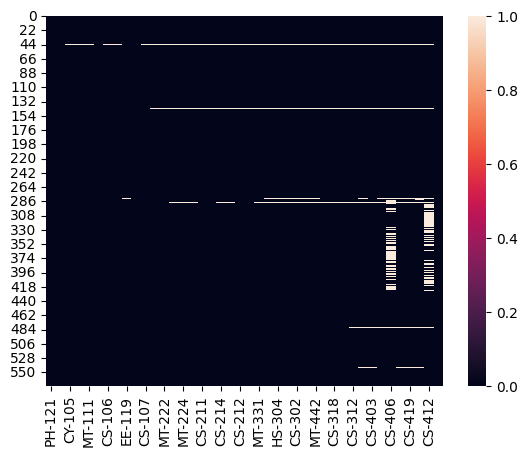

In [7]:
# Visualize  null values using heat-map

sns.heatmap(df_raw.isnull())

Encoding the categorical values this will treat null values as one separate category

In [8]:
# Encoding the independent labels using LabelEncoder

from sklearn.preprocessing import LabelEncoder

df_ind = df_raw.iloc[:,:-1]
le = LabelEncoder()

for index in df_ind.columns.to_list():
  df_raw[index] = le.fit_transform(df_raw[index])

df_raw.sample(5)

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
360,2,0,4,4,0,4,4,0,2,4,...,0,3,2,3,14,2,5,2,3,3.477
231,2,5,4,10,8,2,7,2,7,5,...,8,7,2,8,2,2,5,5,2,2.701
436,0,3,0,4,0,0,7,0,0,3,...,1,0,0,2,0,7,0,0,0,3.730
527,8,9,3,4,8,5,7,3,7,4,...,9,9,0,11,10,9,7,8,11,1.957
216,5,2,2,0,6,2,2,2,7,6,...,5,5,6,8,2,2,8,4,2,2.931


In [9]:
# checking dataframe after Encoding

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 42 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PH-121     571 non-null    int64  
 1   HS-101     571 non-null    int64  
 2   CY-105     571 non-null    int64  
 3   HS-105/12  571 non-null    int64  
 4   MT-111     571 non-null    int64  
 5   CS-105     571 non-null    int64  
 6   CS-106     571 non-null    int64  
 7   EL-102     571 non-null    int64  
 8   EE-119     571 non-null    int64  
 9   ME-107     571 non-null    int64  
 10  CS-107     571 non-null    int64  
 11  HS-205/20  571 non-null    int64  
 12  MT-222     571 non-null    int64  
 13  EE-222     571 non-null    int64  
 14  MT-224     571 non-null    int64  
 15  CS-210     571 non-null    int64  
 16  CS-211     571 non-null    int64  
 17  CS-203     571 non-null    int64  
 18  CS-214     571 non-null    int64  
 19  EE-217     571 non-null    int64  
 20  CS-212    

Encoding has assigned null value as a category, hence no null values are present in the dataset

In [10]:
# checking Statsistical Summary

df_raw.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,...,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000,571.000000
mean,3.781086,5.071804,2.921191,4.264448,3.935201,2.838879,4.161121,3.998249,3.921191,4.817863,...,4.299475,4.982487,3.663748,5.595447,4.770578,2.693520,4.084063,4.211909,4.570928,2.954888
std,3.046895,2.785317,2.992228,3.216478,3.034481,2.696709,2.774311,3.075939,2.698100,3.179170,...,3.580108,2.927134,3.128656,2.916243,4.565881,2.931189,2.656988,3.040475,4.085464,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,4.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,3.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,5.000000,7.000000,6.000000,4.000000,6.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,6.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,3.451000
max,12.000000,11.000000,13.000000,13.000000,13.000000,10.000000,13.000000,13.000000,12.000000,13.000000,...,14.000000,12.000000,11.000000,13.000000,14.000000,13.000000,12.000000,12.000000,13.000000,3.985000


In [11]:
# cehck Skewness

df_raw.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       1.001752
HS-105/12    0.337649
MT-111       0.520916
CS-105       0.930769
CS-106       0.682923
EL-102       0.532311
EE-119       0.607213
ME-107       0.131791
CS-107       0.456184
HS-205/20    1.155648
MT-222       0.267531
EE-222       0.864582
MT-224       0.566537
CS-210       0.966469
CS-211       0.202623
CS-203       0.337821
CS-214       0.120394
EE-217       0.876835
CS-212       0.459739
CS-215       0.288215
MT-331       0.674150
EF-303       0.547945
HS-304       0.814333
CS-301       0.489045
CS-302       0.697409
TC-383       0.379712
MT-442       0.970582
EL-332       0.587335
CS-318       0.511718
CS-306       0.575364
CS-312       0.561465
CS-317       0.273812
CS-403       0.638689
CS-421       0.317459
CS-406       1.105583
CS-414       1.592209
CS-419       0.773674
CS-423       0.627219
CS-412       1.086028
CGPA        -0.497203
dtype: float64

**Skewness is within or close to permissible limits**

# GRAPHICAL ANALYSIS

UNIVARIATE

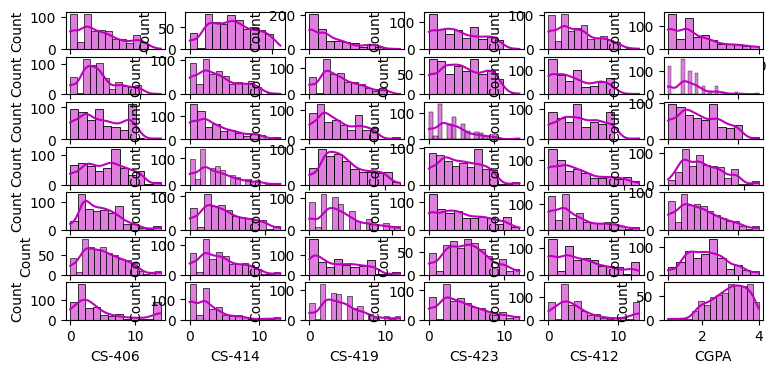

In [12]:
# Check Histplot to understand distribution

mp.figure(figsize=(9,4))
pnum = 1

for index in df_raw.columns.to_list():
  if(pnum<=42):
    ax = mp.subplot(7,6, pnum)
    sns.histplot(df_raw[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

*Slight Skewness can be seen in some of the labels*

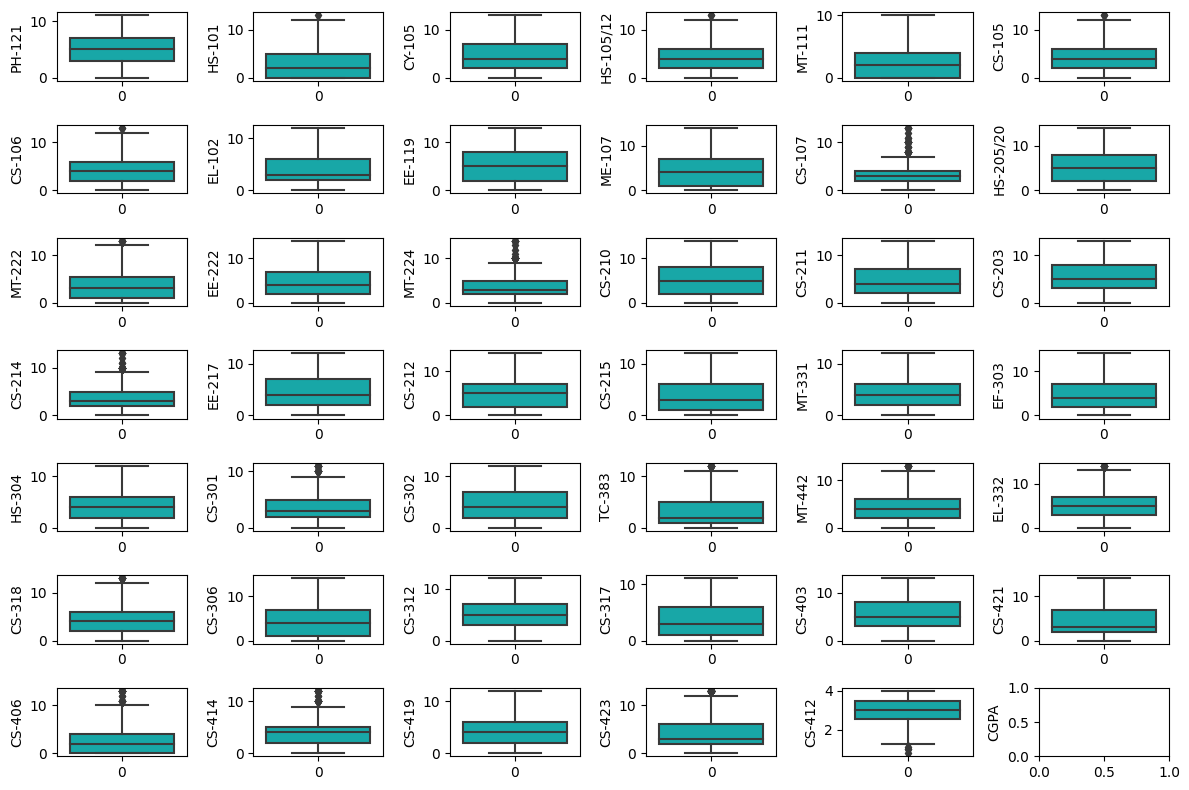

In [13]:
# Checking Boxplot to visualize outliers

mp.figure(figsize=(12,8))
pnum = 1

for index in df_raw.columns.to_list():
  if(pnum<=42):
    sns.boxplot(df_raw[index], color = 'c')
    ax = mp.subplot(7,6,pnum)
    mp.ylabel(index)
  pnum = pnum+1
  mp.tight_layout()

mp.show()

*Very few outliers*


BIVARIATE ANALYSIS

<Axes: >

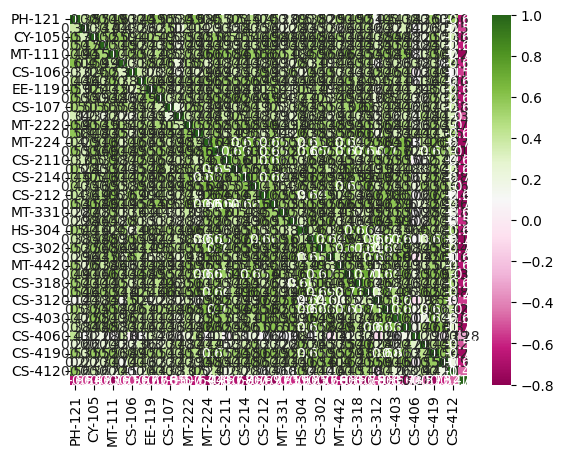

In [14]:
# Chekcing correlation heatmap to understand relationship between pair of independent variables

sns.heatmap(round(df_raw.corr(),2), cmap = 'PiYG', annot = True)

In [15]:
# Since heatmap is lghtly cluttered checking correlation of various labels with target label

df_raw.corr().iloc[:,-1]

PH-121      -0.663135
HS-101      -0.537170
CY-105      -0.670190
HS-105/12   -0.627644
MT-111      -0.756109
CS-105      -0.613169
CS-106      -0.563178
EL-102      -0.669536
EE-119      -0.668787
ME-107      -0.677342
CS-107      -0.650531
HS-205/20   -0.500668
MT-222      -0.695418
EE-222      -0.644384
MT-224      -0.743577
CS-210      -0.798841
CS-211      -0.669814
CS-203      -0.682817
CS-214      -0.758407
EE-217      -0.703131
CS-212      -0.686163
CS-215      -0.768707
MT-331      -0.610787
EF-303      -0.589066
HS-304      -0.656729
CS-301      -0.747775
CS-302      -0.770868
TC-383      -0.682447
MT-442      -0.656557
EL-332      -0.803475
CS-318      -0.660106
CS-306      -0.783624
CS-312      -0.562341
CS-317      -0.800771
CS-403      -0.657128
CS-421      -0.742041
CS-406      -0.280626
CS-414      -0.512836
CS-419      -0.732899
CS-423      -0.624558
CS-412      -0.470128
CGPA         1.000000
Name: CGPA, dtype: float64

-ve correlation found between encoded grades and CGPA

In [16]:
# Removing Outliers where |Z-score| > 3

df_features = df_raw.iloc[:,:-1]
df_target = df_raw['CGPA']
df_gr_zs = df_raw[(np.abs(sp.zscore(df_features)) <= 3).all(axis=1)]

print(df_gr_zs.shape)

(556, 42)


Around 16 rows identified as outliers & removed

In [17]:
# Rechecking skewness

df_gr_zs.skew()

PH-121       0.561325
HS-101       0.059312
CY-105       0.961297
HS-105/12    0.325083
MT-111       0.428842
CS-105       0.963058
CS-106       0.610229
EL-102       0.474081
EE-119       0.553553
ME-107       0.091446
CS-107       0.393008
HS-205/20    0.765317
MT-222       0.167293
EE-222       0.728173
MT-224       0.393790
CS-210       0.647880
CS-211       0.075122
CS-203       0.243867
CS-214       0.006669
EE-217       0.672329
CS-212       0.401048
CS-215       0.120711
MT-331       0.604700
EF-303       0.352310
HS-304       0.515364
CS-301       0.380912
CS-302       0.570915
TC-383       0.321381
MT-442       0.852822
EL-332       0.431139
CS-318       0.333360
CS-306       0.392752
CS-312       0.402160
CS-317       0.150608
CS-403       0.603522
CS-421       0.130217
CS-406       1.214511
CS-414       1.204268
CS-419       0.471732
CS-423       0.496676
CS-412       1.189702
CGPA        -0.331705
dtype: float64

Skewness is within permissible limit

In [18]:
# Checking Multicollinearity using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_feat = df_gr_zs.iloc[:,:-1]
vif = pd.DataFrame()
vif['Feature'] = df_feat.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_feat.values,i) for i in range(len(df_feat.columns))]

vif

,Feature,VIF Val
0,PH-121,7.512728
1,HS-101,7.266920
2,CY-105,4.708441
3,HS-105/12,6.170024
4,MT-111,7.183086
5,CS-105,4.940219
6,CS-106,6.319752
7,EL-102,5.427182
8,EE-119,6.931778
9,ME-107,7.522534


VIF is found to be very close to 10 and can be accepted, hence not dropping any features

**Separating independent & target label**

In [19]:
# Separate independent & target labels

x_df = df_feat
y_df = df_gr_zs['CGPA']

# Import Libraraies
from sklearn.model_selection import train_test_split

print(x_df.shape)
print(y_df.shape)

(556, 41)
(556,)


# MODELLING

**IMPORT REGRESSION MODEL**

In [20]:
from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [21]:
# Hypertuning various models

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_df, y_df)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)


Lasso() {'random_state': 8, 'alpha': 0.001}
Ridge() {'random_state': 51, 'alpha': 10}
ElasticNet() {'random_state': 59, 'alpha': 0.001}


*Hypertuning Parameter calculated for Lasso, Ridge & ElasticNet*

*Checking Metrics*

In [22]:
from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 8, 'alpha': 0.001},
 {'random_state': 51, 'alpha': 10},
 {'random_state': 59, 'alpha': 0.001}]

Applying Lasso with hypertuned parameters

In [23]:
bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  94 mse: 0.002758809530730616 r2_scr: 0.9911233821506422


Applying Ridge with hypertuned parameters

In [24]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 0.002758809530730616 r2_scr: 0.9911758728319384


In [25]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 0.002758809530730616 r2_scr: 0.991146884677993


**Checking RandomForestRegressor**

In [26]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 28, 'max_features': 'sqrt', 'criterion': 'friedman_mse'}


In [27]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 0.002758809530730616 r2_scr: 0.9627501281073284


**MSE: Is almost same for all models, r2_scr is best in case of Ridge, however for lasso & elasticnet also it is similar**

CHecking CV Score to save best model

In [28]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', cvs.mean() )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.001, random_state=8) : Avg CV Score is  0.9858534920985829
Ridge(alpha=10, random_state=51) : Avg CV Score is  0.9859157743848718
ElasticNet(alpha=0.001, random_state=59) : Avg CV Score is  0.9858775450342886
RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      random_state=28) : Avg CV Score is  0.9591368573685555


CV Score, MSE, r2 Score  is best for Ridge, so saving ridge model for prediction

# Saving the best Model : Ridge(alpha=1, random_state=48)

In [29]:
# Import Joblib

import joblib

joblib.dump(RG, 'Grade_Pred.pkl')

['Grade_Pred.pkl']

*Checking the prediction*

In [30]:
# Load the saved model

load_GP = joblib.load('Grade_Pred.pkl')

GP = load_GP

In [31]:
# Predictor Function

def pred_grade(input):
  inp = np.array(input)
  pred_grd  =  GP.predict(inp.reshape(1, -1))

  return pred_grd

In [32]:
# Sample Data for Verifying Prediction

rws = [31, 84, 388, 340, 130]

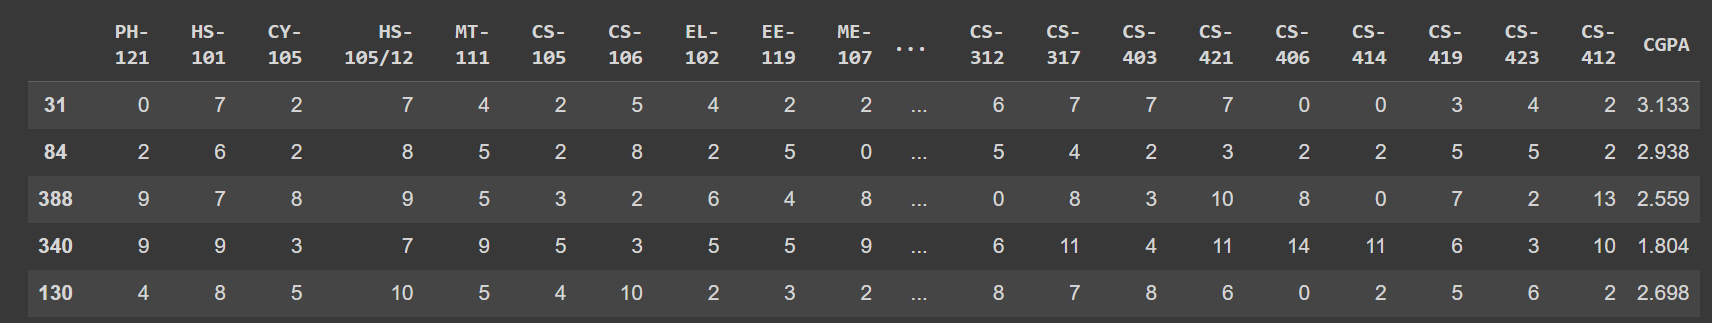

In [33]:
for row in rws:
  print('Actual:', y_df.iloc[row] , 'Predicted by Model:', pred_grade(x_df.iloc[row,:]))

Actual: 3.133 Predicted by Model: [3.08460439]
Actual: 2.378 Predicted by Model: [2.3830175]
Actual: 3.205 Predicted by Model: [3.21992726]
Actual: 3.651 Predicted by Model: [3.63273857]
Actual: 2.579 Predicted by Model: [2.57556677]


**Predicted Grades are very close to the actual grade, seems our model is working fine**